In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import meteva.base as meb
import meteva.method as mem
import meteva.product as mpd
import numpy as np
import datetime
import copy
import matplotlib.pyplot as plt
import time
import pandas as pd
import math
import matplotlib as mpl

In [2]:
para= {
    "ip_port_file":r"H:\test_data\input\meb\ip_port.txt",
    "local_binary_dir":"O:/data/mdfs",
    "local_sta_dir": "O:/data/sta",
    "local_grid_dir":"O:/data/grid",
    "max_save_day":7,
    }

最近一周温度预报温度性对比

In [3]:
dir_ob = "SURFACE\QC_BY_FSOL\TMP_ALL_STATION/YYYYMMDDHH0000.000"
now = datetime.datetime.now()
today = datetime.datetime(now.year,now.month,now.day,8,0)
station_alt = meb.read_station(meb.station_国家站)
station = station_alt.copy()
station["data0"] = meb.IV
id_dict = {"北京":54511,"哈尔滨":50953, "武汉":57494,"广州":59287}
id_list = []
for key in id_dict.keys():
    id_list.append(id_dict[key])
station_city = meb.in_id_list(station,id_list)
veri_day_count =7
time1 = today - datetime.timedelta(days = veri_day_count)
tweek_ago = time1 - datetime.timedelta(days = veri_day_count)

In [4]:
#读取观测数据
ob_list = []
time2 = time1
while time2 <= now:
    path = meb.tool.path_tools.get_path(dir_ob,time2)
    sta = mpd.application.read_stadata(para,path,station = station)
    meb.set_stadata_names(sta,["ob"])
    ob_list.append(sta)
    time2 = time2 + datetime.timedelta(hours = 3)
ob_all = pd.concat(ob_list,axis = 0)

O:/data/sta/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200417/20200417080000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200417/20200417110000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200417/20200417140000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200417/20200417170000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200417/20200417200000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200417/20200417230000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200418/20200418020000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200418/20200418050000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200418/20200418080000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200418/20200418110000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200418/20200418140000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200418/20200418170000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200418/20200418200000.000
O:/data/sta/SURFACE\QC_BY

In [30]:
#读取模式数据
dir_scmoc = r"NWFD_SCMOC\TMP\2M_ABOVE_GROUND\YYMMDDHH.TTT"
scmoc_list = []
time2 = time1 
while time2 <= now:
    for dh in range(3,145,3):
        path = meb.tool.path_tools.get_path(dir_scmoc,time2,dh)
        sta = mpd.application.read_stadata_from_griddata(para,path,station)
        meb.set_stadata_coords(sta,time = time2,dtime = dh,level = 0)
        meb.set_stadata_names(sta,["scmoc"])
        scmoc_list.append(sta)
    time2 = time2 + datetime.timedelta(hours = 12)
scmoc_all = pd.concat(scmoc_list,axis = 0)

O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200417/20041708.003.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200417/20041708.006.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200417/20041708.009.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200417/20041708.012.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200417/20041708.015.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200417/20041708.018.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200417/20041708.021.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200417/20041708.024.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200417/20041708.027.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200417/20041708.030.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200417/20041708.033.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200417/20041708.036.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200417/20041708.039.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200417/20041708.042.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABO

O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200418/20041808.084.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200418/20041808.087.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200418/20041808.090.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200418/20041808.093.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200418/20041808.096.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200418/20041808.099.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200418/20041808.102.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200418/20041808.105.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200418/20041808.108.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200418/20041808.111.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200418/20041808.114.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200418/20041808.117.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200418/20041808.120.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200418/20041808.123.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABO

O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200419/20041920.009.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200419/20041920.012.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200419/20041920.015.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200419/20041920.018.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200419/20041920.021.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200419/20041920.024.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200419/20041920.027.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200419/20041920.030.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200419/20041920.033.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200419/20041920.036.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200419/20041920.039.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200419/20041920.042.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200419/20041920.045.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200419/20041920.048.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABO

O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20042020.093
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20042020.096
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20042020.099
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20042020.102
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20042020.105
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20042020.108
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20042020.111
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20042020.114
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20042020.117
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20042020.120
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20042020.123
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20042020.126
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20042020.129
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20042020.132
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20042020.135
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20042020.138
O:/data/mdfs/NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20042020.141
O:/data/mdfs/NWFD_SCMOC\TMP\2M_

O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200422/20042208.027.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200422/20042208.030.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200422/20042208.033.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200422/20042208.036.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200422/20042208.039.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200422/20042208.042.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200422/20042208.045.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200422/20042208.048.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200422/20042208.051.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200422/20042208.054.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200422/20042208.057.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200422/20042208.060.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200422/20042208.063.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200422/20042208.066.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABO

O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200423/20042308.096.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200423/20042308.099.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200423/20042308.102.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200423/20042308.105.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200423/20042308.108.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200423/20042308.111.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200423/20042308.114.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200423/20042308.117.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200423/20042308.120.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200423/20042308.123.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200423/20042308.126.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200423/20042308.129.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200423/20042308.132.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200423/20042308.135.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABO

In [6]:
#读取模式数据
dir_grapes = r"GRAPES_GFS\TMP\2M_ABOVE_GROUND\YYMMDDHH.TTT"
grapes_list = []
time2 = time1 
while time2 <= now:
    for dh in range(3,145,3):
        path = meb.tool.path_tools.get_path(dir_grapes,time2,dh)
        sta = mpd.application.read_stadata_from_griddata(para,path,station)
        if sta is not None:
            meb.set_stadata_coords(sta,time = time2,dtime = dh,level = 0)
            meb.set_stadata_names(sta,["grapes_gfs"])
            grapes_list.append(sta)
    time2 = time2 + datetime.timedelta(hours = 12)
grapes_all = pd.concat(grapes_list,axis = 0)

O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200417/20041708.003.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200417/20041708.006.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200417/20041708.009.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200417/20041708.012.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200417/20041708.015.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200417/20041708.018.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200417/20041708.021.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200417/20041708.024.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200417/20041708.027.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200417/20041708.030.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200417/20041708.033.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200417/20041708.036.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200417/20041708.039.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200417/20041708.042.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABO

O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200418/20041808.072.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200418/20041808.075.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200418/20041808.078.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200418/20041808.081.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200418/20041808.084.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200418/20041808.087.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200418/20041808.090.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200418/20041808.093.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200418/20041808.096.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200418/20041808.099.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200418/20041808.102.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200418/20041808.105.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200418/20041808.108.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200418/20041808.111.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABO

GRAPES_GFS\TMP\2M_ABOVE_GROUND\20041908.135
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200419/20041908.138.nc
GRAPES_GFS\TMP\2M_ABOVE_GROUND\20041908.141
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200419/20041908.144.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200419/20041920.003.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200419/20041920.006.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200419/20041920.009.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200419/20041920.012.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200419/20041920.015.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200419/20041920.018.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200419/20041920.021.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200419/20041920.024.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200419/20041920.027.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200419/20041920.030.nc
O:/data/gr

O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200420/20042020.054.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200420/20042020.057.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200420/20042020.060.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200420/20042020.063.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200420/20042020.066.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200420/20042020.069.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200420/20042020.072.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200420/20042020.075.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200420/20042020.078.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200420/20042020.081.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200420/20042020.084.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200420/20042020.087.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200420/20042020.090.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200420/20042020.093.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABO

GRAPES_GFS\TMP\2M_ABOVE_GROUND\20042120.123
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200421/20042120.126.nc
GRAPES_GFS\TMP\2M_ABOVE_GROUND\20042120.129
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200421/20042120.132.nc
GRAPES_GFS\TMP\2M_ABOVE_GROUND\20042120.135
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200421/20042120.138.nc
GRAPES_GFS\TMP\2M_ABOVE_GROUND\20042120.141
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200421/20042120.144.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200422/20042208.003.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200422/20042208.006.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200422/20042208.009.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200422/20042208.012.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200422/20042208.015.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200422/20

O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200423/20042308.039.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200423/20042308.042.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200423/20042308.045.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200423/20042308.048.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200423/20042308.051.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200423/20042308.054.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200423/20042308.057.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200423/20042308.060.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200423/20042308.063.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200423/20042308.066.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200423/20042308.069.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200423/20042308.072.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200423/20042308.075.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200423/20042308.078.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABO

In [7]:

#读取模式数据
dir_gmosrr = r"GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\YYMMDDHH.TTT"
gmosrr_list = []
time2 = time1 
while time2 <= now:
    for dh in range(3,145,3):
        path = meb.tool.path_tools.get_path(dir_gmosrr,time2,dh)
        sta = mpd.application.read_stadata_from_griddata(para,path,station)
        if sta is not None:
            meb.set_stadata_coords(sta,time = time2,dtime = dh,level = 0)
            meb.set_stadata_names(sta,["gmosrr"])
            gmosrr_list.append(sta)
    time2 = time2 + datetime.timedelta(hours = 12)
gmosrr_all = pd.concat(gmosrr_list,axis = 0)


O:/data/grid/GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND/20200417/20041708.003.nc
O:/data/grid/GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND/20200417/20041708.006.nc
O:/data/grid/GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND/20200417/20041708.009.nc
O:/data/grid/GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND/20200417/20041708.012.nc
O:/data/grid/GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND/20200417/20041708.015.nc
O:/data/grid/GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND/20200417/20041708.018.nc
O:/data/grid/GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND/20200417/20041708.021.nc
O:/data/grid/GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND/20200417/20041708.024.nc
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041708.027
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041708.030
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041708.033
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041708.036
unpack requires a buffer of 2

GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041720.138
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041720.141
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041720.144
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041808.003
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041808.006
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041808.009
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041808.012
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041808.015
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041808.018
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041808.021
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041808.024
unpack requires a buffer 

GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041820.117
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041820.120
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041820.123
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041820.126
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041820.129
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041820.132
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041820.135
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041820.138
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041820.141
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041820.144
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041908.003
unpack requires a buffer 

unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041920.111
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041920.114
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041920.117
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041920.120
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041920.123
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041920.126
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041920.129
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041920.132
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041920.135
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20041920.138
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\2

unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042020.102
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042020.105
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042020.108
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042020.111
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042020.114
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042020.117
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042020.120
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042020.123
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042020.126
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042020.129
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\2

GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042120.093
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042120.096
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042120.099
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042120.102
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042120.105
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042120.108
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042120.111
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042120.114
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042120.117
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042120.120
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042120.123
unpack requires a buffer 

unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042220.090
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042220.093
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042220.096
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042220.099
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042220.102
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042220.105
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042220.108
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042220.111
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042220.114
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042220.117
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\2

GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042320.075
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042320.078
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042320.081
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042320.084
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042320.087
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042320.090
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042320.093
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042320.096
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042320.099
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042320.102
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20042320.105
unpack requires a buffer 

In [8]:
ob_all = meb.between_value_range(ob_all,-60,60)

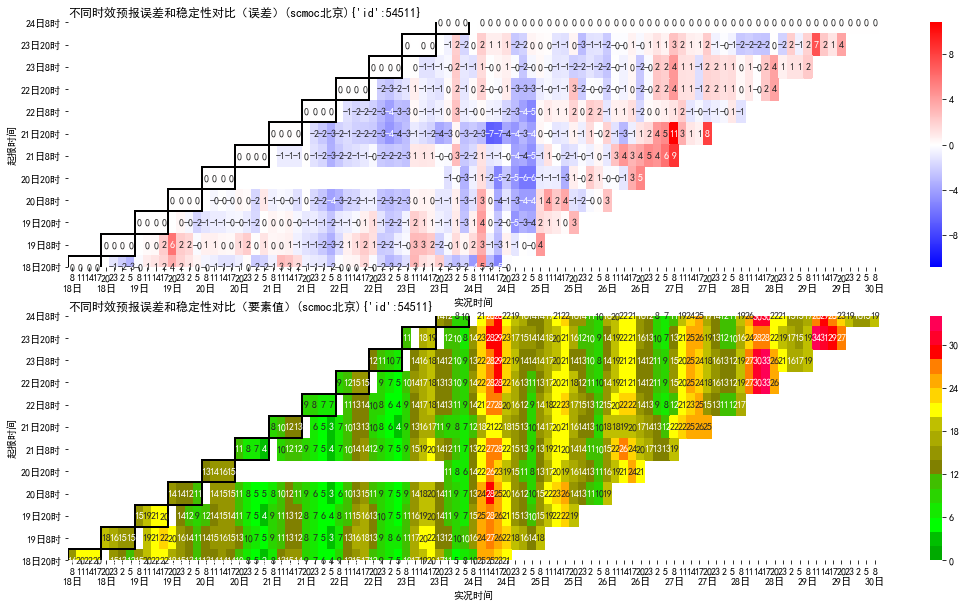

In [31]:
#开始检验
key ="北京"
sta_ob = meb.in_id_list(ob_all,[id_dict[key]])
sta_scmoc = meb.in_id_list(scmoc_all,[id_dict[key]])
sta_scmoc = meb.sele_by_para(sta_scmoc,value = [-100,100])
meb.set_stadata_names(sta_scmoc,["scmoc"+key])
ob_fo = meb.combine_on_obTime_id(sta_ob,[sta_scmoc])
mpd.time_list_mesh_temp(ob_fo)

[129, 3, 132, 6, 135, 9, 138, 12, 141, 15, 144, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126]


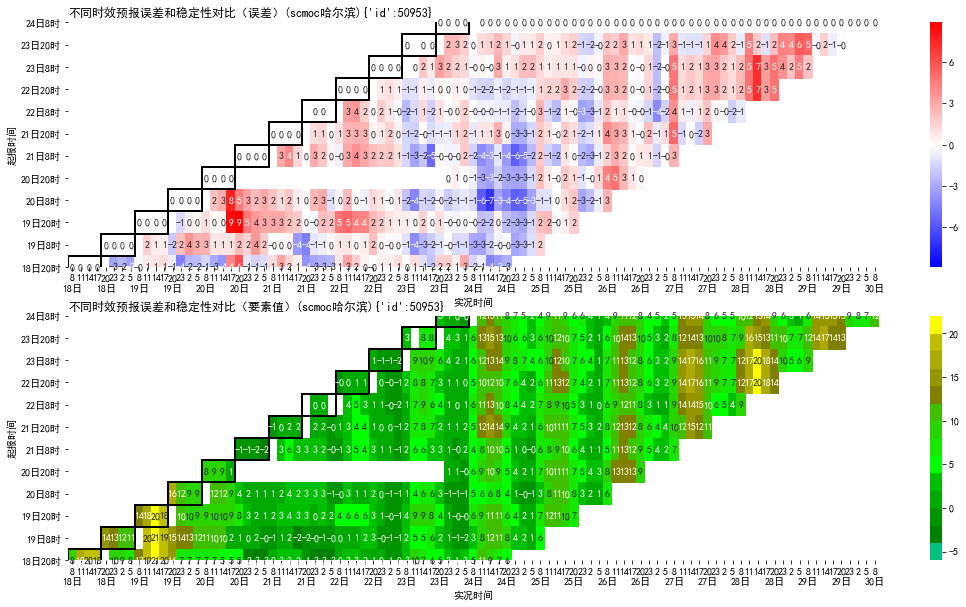

In [18]:
key ="哈尔滨"
sta_ob = meb.in_id_list(ob_all,[id_dict[key]])
sta_scmoc = meb.in_id_list(scmoc_all,[id_dict[key]])
sta_scmoc = meb.sele_by_para(sta_scmoc,value = [-100,100])
meb.set_stadata_names(sta_scmoc,["scmoc"+key])
ob_fo = meb.combine_on_obTime_id(sta_ob,[sta_scmoc])
mpd.time_list_mesh_temp(ob_fo)

[129, 3, 132, 6, 135, 9, 138, 12, 141, 15, 144, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126]


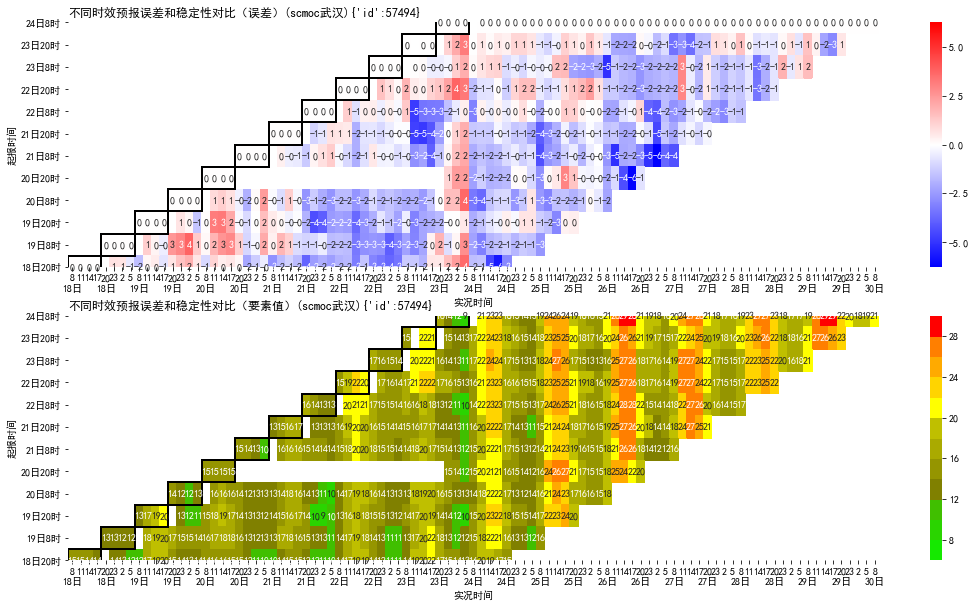

In [19]:
key ="武汉"
sta_ob = meb.in_id_list(ob_all,[id_dict[key]])
sta_scmoc = meb.in_id_list(scmoc_all,[id_dict[key]])
sta_scmoc = meb.sele_by_para(sta_scmoc,value = [-100,100])
meb.set_stadata_names(sta_scmoc,["scmoc"+key])
ob_fo = meb.combine_on_obTime_id(sta_ob,[sta_scmoc])
mpd.time_list_mesh_temp(ob_fo)

[129, 3, 132, 6, 135, 9, 138, 12, 141, 15, 144, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126]


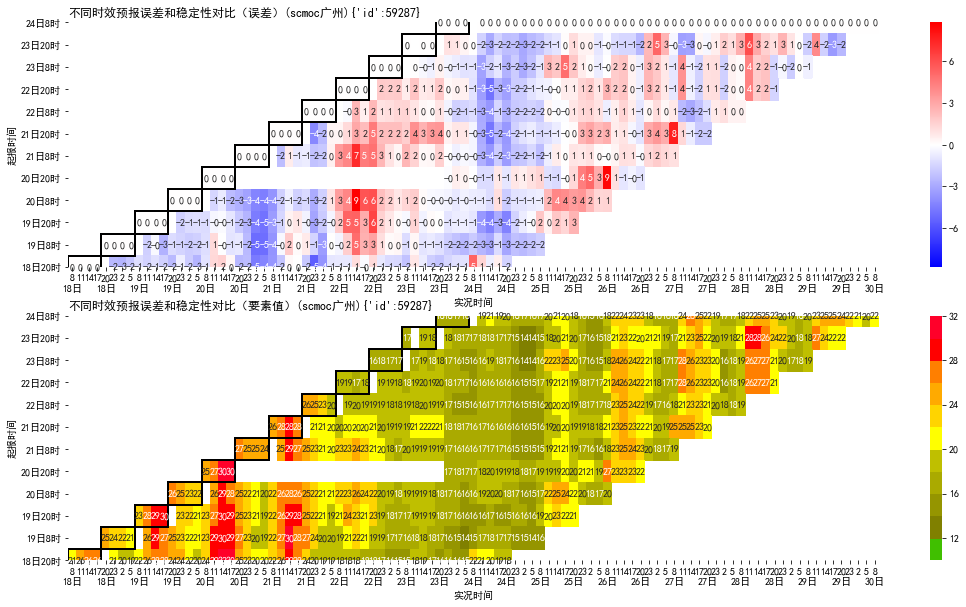

In [20]:
key ="广州"
sta_ob = meb.in_id_list(ob_all,[id_dict[key]])
sta_scmoc = meb.in_id_list(scmoc_all,[id_dict[key]])
sta_scmoc = meb.sele_by_para(sta_scmoc,value = [-100,100])
meb.set_stadata_names(sta_scmoc,["scmoc"+key])
ob_fo = meb.combine_on_obTime_id(sta_ob,[sta_scmoc])
mpd.time_list_mesh_temp(ob_fo)

In [21]:
scmoc_all = meb.sele_by_para(scmoc_all,value = [-100,100])

In [22]:
sta_all = meb.combine_on_obTime_id(ob_all,[scmoc_all,grapes_all])
sta_all = meb.not_IV(sta_all)

[129, 3, 132, 6, 135, 9, 138, 12, 141, 15, 144, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126]


误差绝对值前1的站点：
id:56385   lon:103.33  lat:29.52 value:8.506631


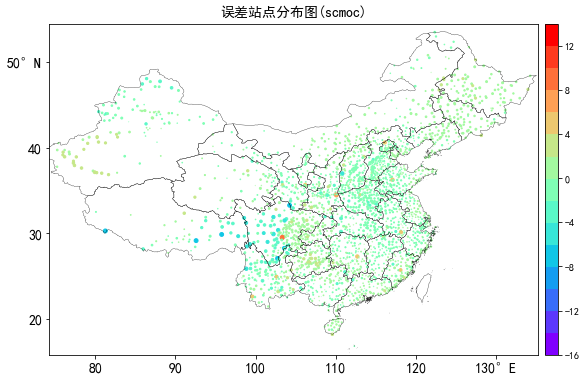

误差绝对值前1的站点：
id:56247   lon:99.1  lat:30.0 value:-15.415365


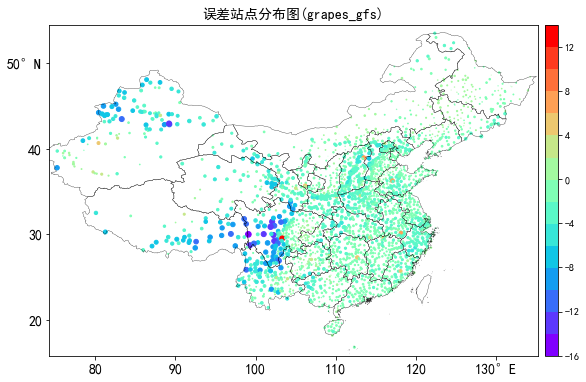

In [23]:
mpd.me_scatter(sta_all)

误差绝对值前1的站点：
id:56385   lon:103.33  lat:29.52 value:8.515649


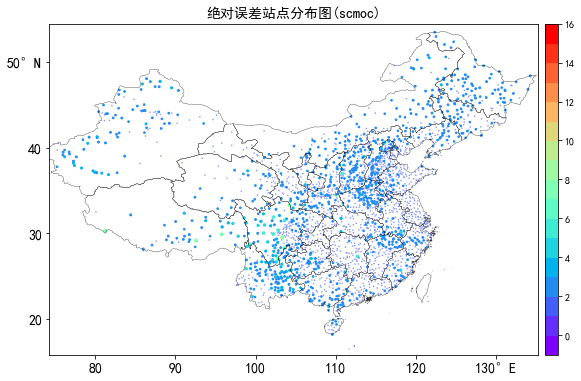

误差绝对值前1的站点：
id:56247   lon:99.1  lat:30.0 value:15.415365


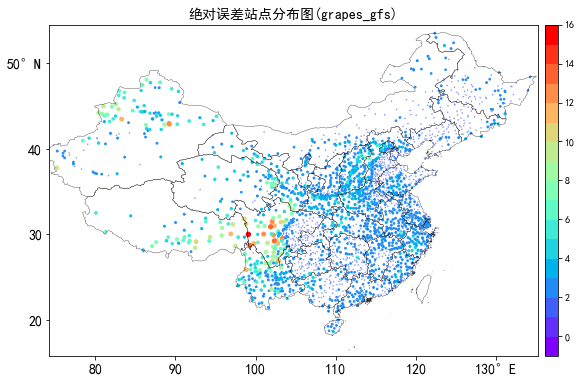

In [35]:
mpd.mae_scatter(sta_all,threshold = 2)

误差绝对值前1的站点：
id:56385   lon:103.33  lat:29.52 value:8.506631


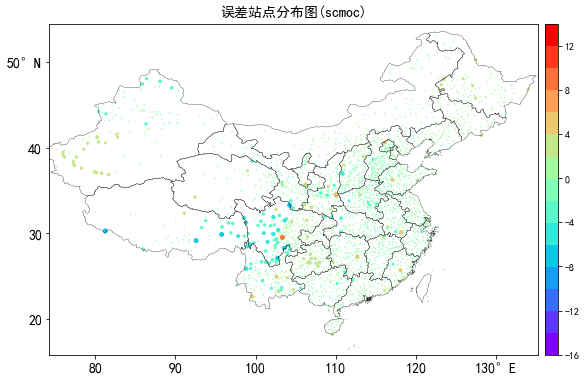

误差绝对值前1的站点：
id:56247   lon:99.1  lat:30.0 value:-15.415365


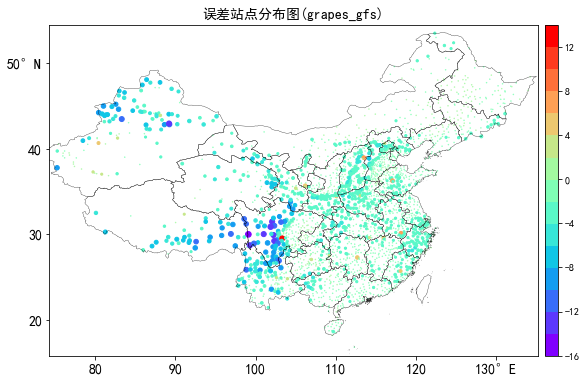

In [36]:
mpd.me_scatter(sta_all,threshold = 2)

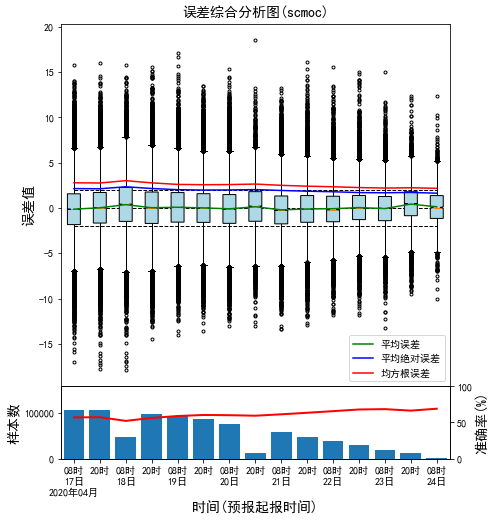

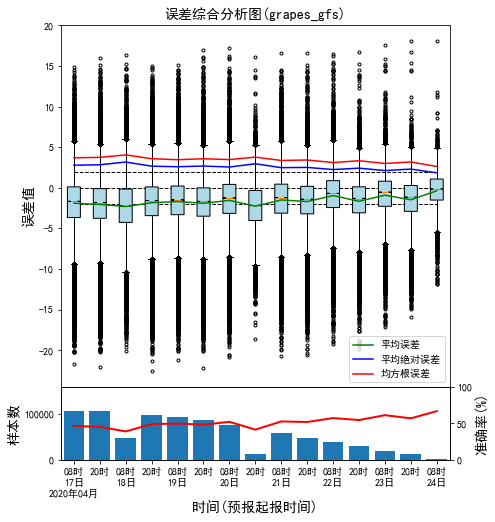

In [25]:
mpd.error_boxplot(sta_all,g = "time",threshold = 2)

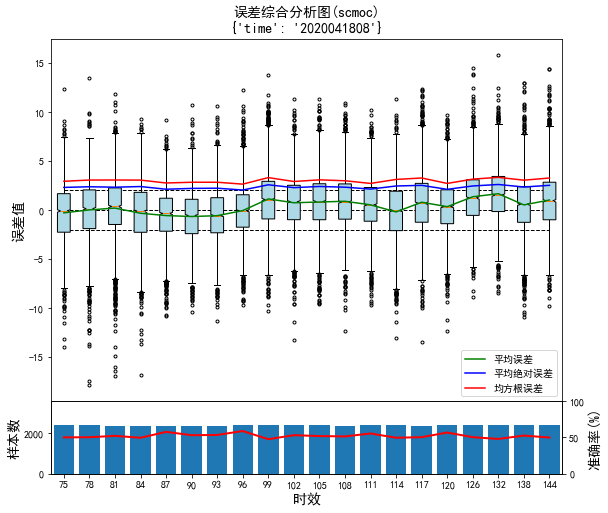

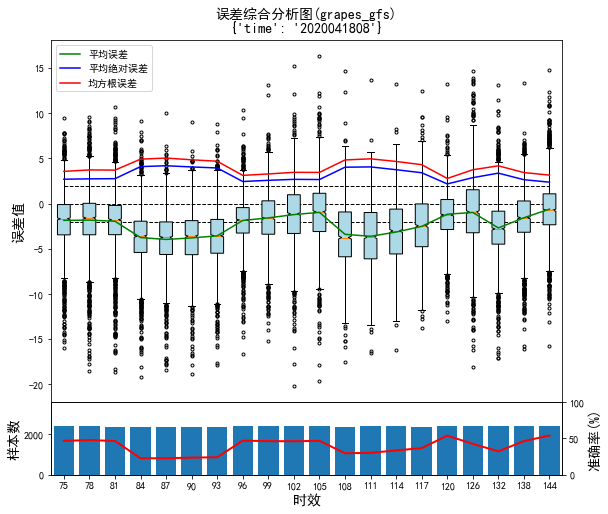

In [28]:
mpd.error_boxplot(sta_all,s = {"time":"2020041808"},g = "dtime")

误差绝对值前1的站点：
id:56227   lon:95.77  lat:29.87 value:-7.97895


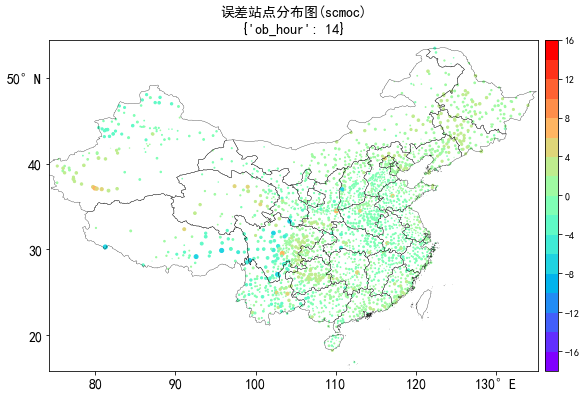

误差绝对值前1的站点：
id:51572   lon:89.25  lat:42.83 value:-17.621605


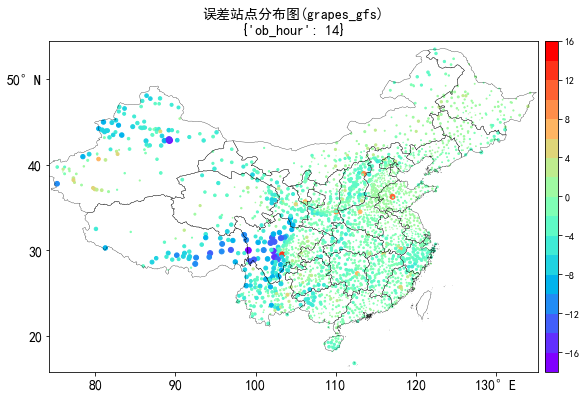

In [29]:
mpd.me_scatter(sta_all,s = {"ob_hour":14})

In [ ]:
mpd.me_scatter(sta_all,s = {"ob_hour":2})

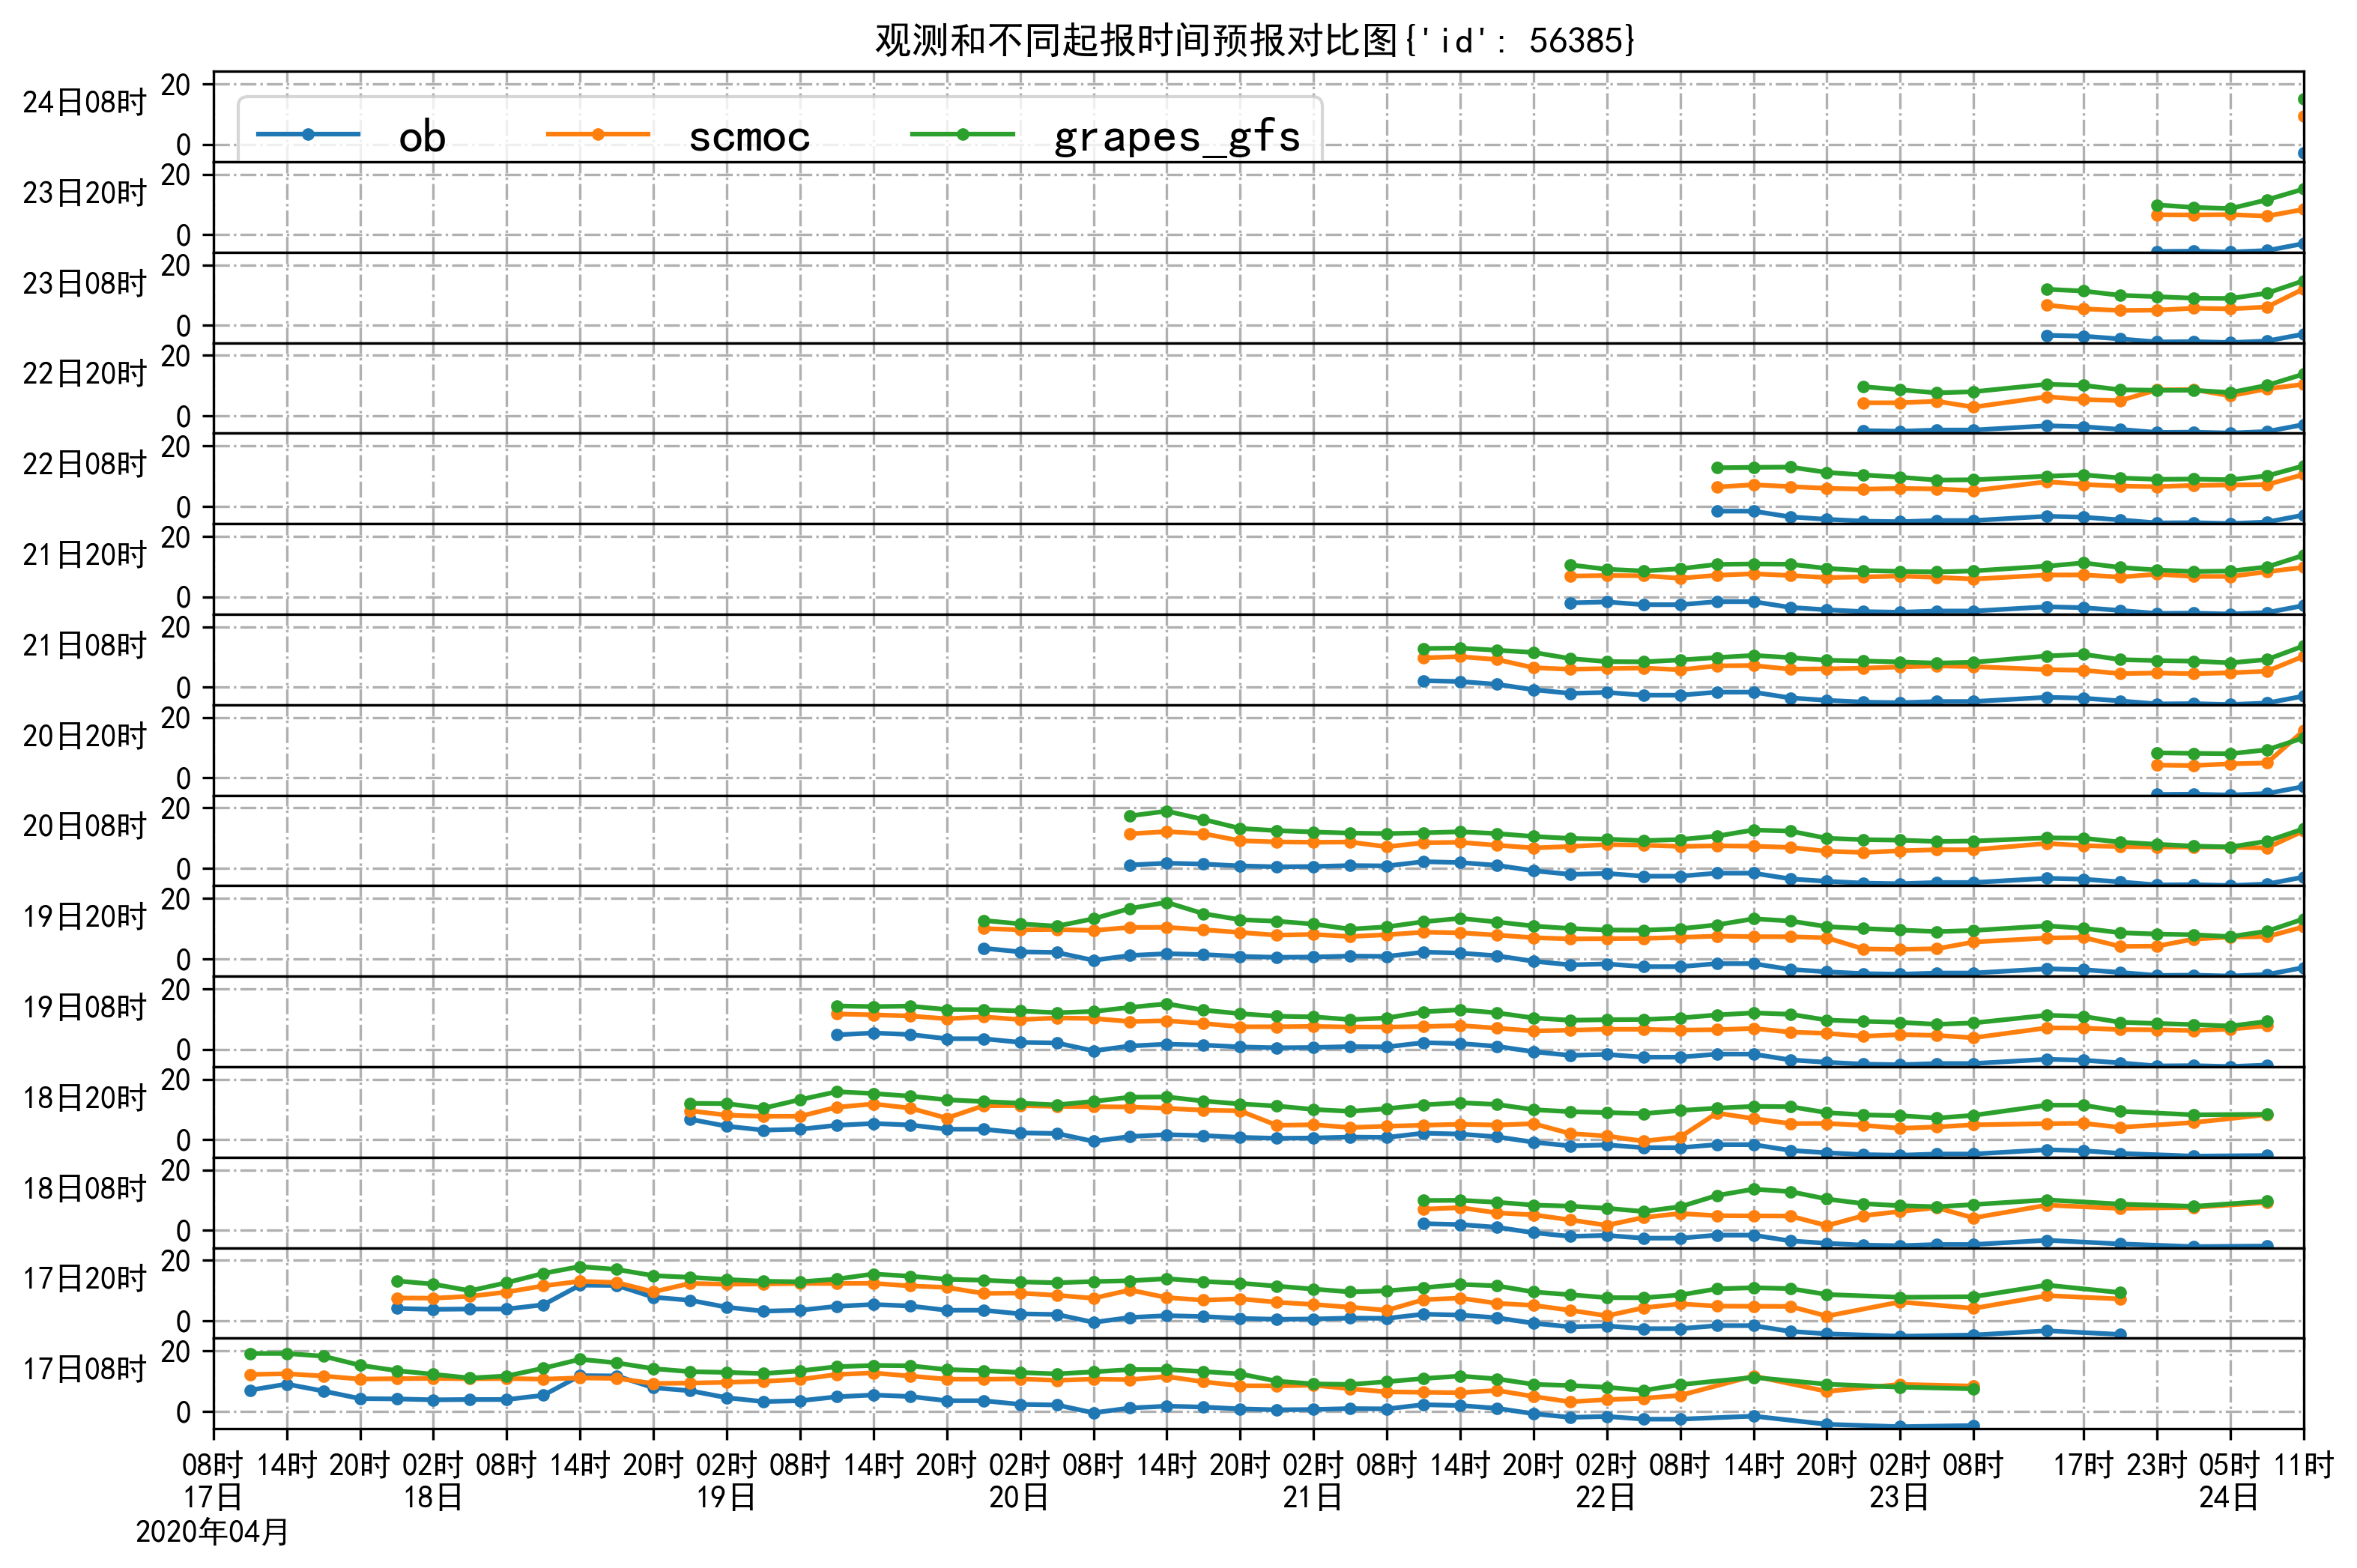

In [33]:
meb.set_stadata_names(sta_all,["ob","scmoc","grapes_gfs"])
sta1 = meb.in_id_list(sta_all,[56385])
mpd.time_list_line(sta1)

In [ ]:
meb.set_stadata_names(sta_all,["ob","scmoc","grapes_gfs"])
sta1 = meb.in_id_list(sta_all,[id_dict["武汉"]])
mpd.time_list_line_error(sta1)

In [ ]:
meb.set_stadata_names(sta_all,["ob","scmoc","grapes_gfs"])
sta1 = meb.in_id_list(sta_all,[id_dict["广州"]])
mpd.time_list_line(sta1)

In [ ]:
station_alt = meb.read_stadata_from_micaps3(meb.station_国家站)
group_name_list=[]
id_list_list=[]
for i in range(10):
    salt = 500* i
    ealt = 500* (i+1)
    sta = meb.between_value_range(station_alt,salt,ealt)
    id_list_list.append(sta.loc[:,"id"].values.tolist())
    group_name_list.append(str(salt)+"-"+str(ealt))

In [ ]:
result = mpd.score(sta_all,mem.rmse,g = "id",gll = id_list_list)

In [ ]:
fig = plt.figure(figsize = (12,5))
x =np.arange(len(result[0]))
plt.plot(x,result[0][:,0],label = "scmoc")
plt.plot(x,result[0][:,1],label = "grapes-gfs")
plt.xticks(x,group_name_list)
plt.legend(fontsize = 14)
plt.ylim(0,7)
plt.xlabel("站点高度",fontsize = 14)
plt.ylabel("rmse",fontsize = 14)

In [ ]:
result = mpd.score(sta_all,mem.sample_count,g = "id",gll = id_list_list)
fig = plt.figure(figsize = (12,5))
x =np.arange(len(result[0]))
plt.plot(x,result[0][:,0])
plt.xticks(x,group_name_list)
plt.legend(fontsize = 14)
plt.xlabel("站点高度",fontsize = 14)
plt.ylabel("样本数",fontsize = 14)

In [ ]:
#sta_all_24 = meb.combine_on_obTime_id(ob_all,[scmoc_all,gmosrr_all])
#sta_all_24 = meb.not_IV(sta_all_24)

In [ ]:
#mpd.mae_scatter(sta_all_24)

In [ ]:
#mpd.error_boxplot(sta_all_24,"time",threshold = 2)

In [ ]:
mpd.me_scatter(sta_all,s = {"time":"2020032520","dtime" :12})

In [ ]:
mpd.me_scatter(sta_all,s = {"time":"2020031908","dtime" :6,"lon":[108,120],"lat":[20,29]})

In [ ]:
meb.sele_by_dict(sta_all,s = {"id":id_dict["广州"],"time":"2020031820"})

In [ ]:
mpd.me_scatter(sta_all,s = {"time":"2020032508","dtime" :12})

In [ ]:
tmin_all = pd.read_hdf(r"H:\tmin.h5","df")

In [ ]:
mpd.time_list_line_error(tmin_all,s = {"id":57494})

In [ ]:
sta_all.to_hdf(r"H:\t2m_3h.h5",'df')

In [ ]:
mpd.me_scatter(sta_all,s ={"ob_hour":2})

In [ ]:
mpd.score(sta_all,mem.me,s ={"ob_hour":2,"id":57494})